# SVM exercise

A tutorial exercise for using different SVM kernels.

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

If len(X) is 5, then np.random.permutation(5) might produce an array like [2, 0, 3, 4, 1]. These indices can then be used to shuffle the rows of X and y by indexing them with this permutation, ensuring that the data and labels are shuffled consistently.

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np

# Load and preprocess the iris dataset
iris = load_iris()
# here you yous delete all rows of a label and make it a binary class task.
X = iris.data[iris.target != 0, :2]
y = iris.target[iris.target != 0]

# Shuffle the data
np.random.seed(0)
indices = np.random.permutation(len(X))
X, y = X[indices], y[indices].astype(float)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Output the shapes of the training data
X_train.shape, y_train.shape


((90, 2), (90,))

In [5]:
X_train[0], y_train[0]

(array([6. , 2.7]), 1.0)

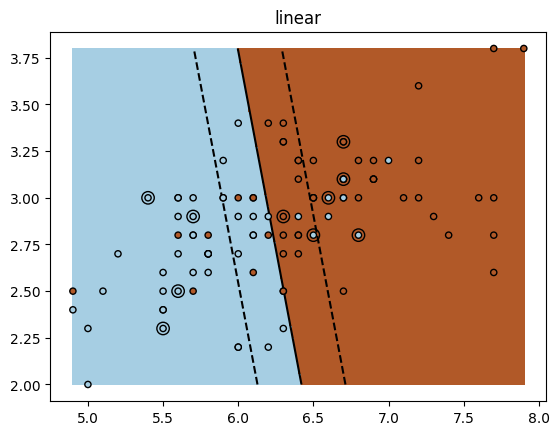

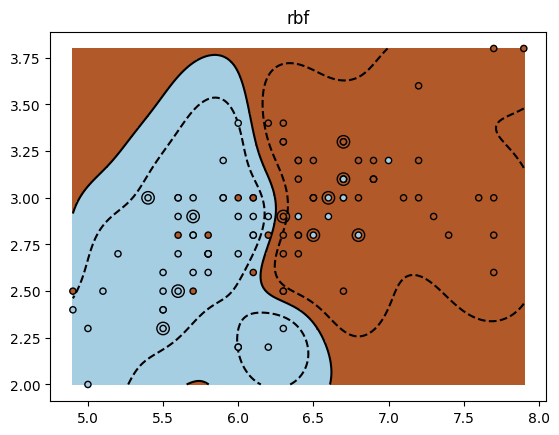

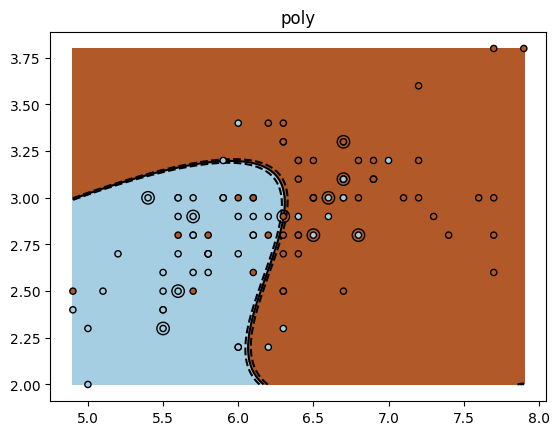

In [12]:
# fit the model
for kernel in ("linear", "rbf", "poly"):
    clf = SVC(kernel=kernel, gamma=10)
    clf.fit(X_train, y_train)

    plt.figure()
    plt.clf()
    plt.scatter(
        X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired, edgecolor="k", s=20
    )

    # Circle out the test data
    plt.scatter(
        X_test[:, 0], X_test[:, 1], s=80, facecolors="none", zorder=10, edgecolor="k"
    )

    plt.axis("tight")
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(
        XX,
        YY,
        Z,
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
        levels=[-0.5, 0, 0.5],
    )

    plt.title(kernel)
plt.show()

### What is SVC?

Support Vector Classification (SVC) aims to find the best boundary (or hyperplane) that separates different classes in your data. Imagine you have data points from two different classes; SVC tries to find the line (in 2D) or plane (in 3D) that best separates these classes with the largest margin.

### Key Parameters in SVC

1. **`C` (Regularization Parameter)**:
   - **Description**: `C` controls the trade-off between achieving a low error on the training data and minimizing the model complexity.
   - **Influence**:
     - **High `C` Value**: The model will try to classify all training examples correctly, which may lead to overfitting if the data is noisy.
     - **Low `C` Value**: The model will allow some misclassifications to achieve a simpler, smoother decision boundary, which can help in generalizing better to new data.

2. **`kernel`**:
   - **Description**: The `kernel` function transforms the data into a higher-dimensional space to make it possible to find a hyperplane that separates the classes. Different kernels allow different types of transformations.
   - **Types**:
     - **`linear`**: No transformation, just a straight line (or hyperplane in higher dimensions).
     - **`poly`**: Polynomial kernel that transforms data into polynomial features. You can control the degree of the polynomial.
     - **`rbf` (Radial Basis Function)**: Transforms the data into an infinite-dimensional space using a Gaussian function. Good for handling non-linear relationships.
     - **`sigmoid`**: Uses the sigmoid function, similar to the activation function in neural networks.
   - **Influence**:
     - **`linear`**: Best for linearly separable data.
     - **`rbf`**: Flexible and can handle complex data structures.
     - **`poly`**: Useful for polynomial relationships, but can lead to overfitting with high degrees.

3. **`gamma`**:
   - **Description**: `gamma` is a parameter for the RBF, polynomial, and sigmoid kernels. It controls the influence of a single training example.
   - **Influence**:
     - **High `gamma` Value**: Each training example has a high influence, leading to a complex model that can overfit the data.
     - **Low `gamma` Value**: Each training example has less influence, leading to a smoother decision boundary that may underfit the data.

4. **`degree`** (only for `poly` kernel):
   - **Description**: The degree of the polynomial kernel function.
   - **Influence**:
     - **High Degree**: Results in more complex decision boundaries which can fit the training data very well but may overfit.
     - **Low Degree**: Simpler model with a less complex decision boundary, which may underfit if too low.

5. **`coef0`** (only for `poly` and `sigmoid` kernels):
   - **Description**: Controls the influence of higher-order terms in the polynomial and sigmoid kernels.
   - **Influence**:
     - **High `coef0` Value**: Increases the influence of higher-order terms.
     - **Low `coef0` Value**: Reduces the influence of higher-order terms.

### Summary of How These Parameters Affect SVC:

- **`C`**: Balances training accuracy and model complexity.
- **`kernel`**: Determines the type of boundary used to separate the classes.
- **`gamma`**: Controls how far the influence of a single training example reaches.
- **`degree`**: Specifies the polynomial degree when using polynomial kernels.
- **`coef0`**: Adjusts the influence of polynomial and sigmoid terms.

Choosing the right combination of these parameters is crucial for building

an effective SVC model. Often, this is done through techniques like grid search with cross-validation to find the optimal parameter settings.

### Practical Example

Imagine you’re using SVC to classify flowers into two types based on features like petal length and petal width.

1. **Regularization Parameter (`C`)**:
   - If you set `C` to a high value, the SVC will try very hard to correctly classify every flower in your training set. This can be good if your training data is very clean but might lead to overfitting if there is noise.
   - A low `C` value will allow some misclassifications, which might help in generalizing better to new data, especially if the data is noisy.

2. **Kernel**:
   - If the flowers can be separated by a straight line (linear separation), the `linear` kernel will work well.
   - If the relationship between features and flower types is more complex, like a curve, you might choose the `rbf` kernel. It’s more flexible and can handle complex boundaries.

3. **Gamma**:
   - With a high `gamma`, the model will pay a lot of attention to individual training points, potentially fitting the training data too closely.
   - With a low `gamma`, the model will consider the broader picture, which might help in making a decision boundary that generalizes better to unseen data.

4. **Degree**:
   - If you use the `poly` kernel, a degree of `2` might capture a simple quadratic relationship, while a degree of `3` or higher might overfit by capturing more complex patterns.

5. **Coef0**:
   - In the case of `poly` or `sigmoid` kernels, `coef0` adjusts the influence of the polynomial or sigmoid terms. Higher values will make the polynomial or sigmoid terms more significant in determining the decision boundary.

By understanding and adjusting these parameters, you can tune the SVC model to fit your specific classification task and improve its performance.

with grid search

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Filter to binary classification (optional, if needed)
X = X[y != 0, :2]
y = y[y != 0]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [14]:
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': [0.001, 0.01, 0.1, 1, 10],  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
    'kernel': ['linear', 'rbf', 'poly']  # Type of kernel
}

# Initialize the SVC model
svc = SVC()

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly']},
             verbose=2)

In [15]:
# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score:.4f}")

# Optionally, you can use the best estimator to make predictions and evaluate performance
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print(f"Test Score: {test_score:.4f}")

Best Parameters: {'C': 0.1, 'gamma': 10, 'kernel': 'poly'}
Best Score: 0.7333
Test Score: 0.9000
